In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import jensenshannon, jaccard
import pandas as pd
import numpy as np
import preprocess
import utilities
import parameters
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [ ]:
def cosine_similarity(vec1, vec2):
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    if norm1 == 0:
        norm1 += 0.00001
    if norm2 == 0:
        norm2 += 0.00001   
    return np.dot(vec1, vec2)/(norm1*norm2)

In [6]:
def minkowski_similarity(u, v, p=2):

    if p <= 0:
        raise ValueError("p must be greater than 0")
    u_v = u - v
    dist = np.linalg.norm(u_v, ord=p)
    if dist == 0:
        dist += 0.0001
        
    return similarities.convert_distance_to_similarity(dist) #converting a distance to similarity

In [ ]:
def wordMover_similarity(sent1, sent2):
    
    import gensim.downloader as api
    model = api.load('word2vec-google-news-300')
    distance = model.wmdistance(sentence1, sentence2)
    
    return similarities.convert_distance_to_similarity(distance)

In [7]:
def vector_similarity(vec1, vec2, sim_type=sim_type):
    
    if sim_type == 'cosine':
        similarity = cosine_similarity(vec1, vec2)
    if sim_type == 'euclidean':
        similarity = minkowski_similarity(vec1, vec2, 2)
    if sim_type == 'manhattan':
        similarity = minkowski_similarity(vec1, vec2, 1)
    if sim_type == 'chebychev':
        similarity = minkowski_similarity(vec1, vec2, np.inf)
    if sim_type.startswith('minkowski'):
        similarity = minkowski_similarity(vec1, vec2, int(sim_type[-1]))
    if sim_type == 'JS':
        similarity = jensenshannon(vec1, vec2)
    if sim_type == 'word-mover':
        similarity = wordMover_similarity(vec1, vec2)
    return similarity

import pickle
with open('X_num_toy.p', 'rb') as f:
    X_num = pickle.load(f)
with open('y_toy.p', 'rb') as f:
    y = pickle.load(f)

In [9]:
df = utilities.read_data(parameters.data_paths['opp115'])
X = df['text']
y = df.drop(['text'], axis=1)
X = X.apply(preprocess.preprocess_text)
X_num = utilities.vectorize_data(X, embedding_method)

In [ ]:
sentence1 = 'I love to play football'
sentence2 = 'Playing football is my passion'
wordMover_distance(sentence1, sentence2)

In [ ]:
if it works continue

In [ ]:
sim_types = ['cosine', 'euclidean', 'manhattan', 'chebychev', 'minkowski-3', 'JS', 'word-mover']

In [ ]:
similarities = {}

In [11]:
def calculate_within_class_similarity(vecs, sim_type):
    
    similarities = []
    
    for i,j in list(combinations(vecs.index, 2)):
        similarities.append(vector_similarity(vecs.loc[i], vecs.loc[j], sim_type))                
    try:
        avg_similarity = sum(similarities)/len(similarities)
    except AssertionErrors:
        print('Error occured')
        
    return avg_similarity 

In [12]:
def calculate_between_class_similarities(vecs, col1, col2, sim_type):
    
    similarities = []
    
    for idx1 in y[y[col1]==1].index:
        for idx2 in y[y[col2]==1].index:
            similarities.append(vector_similarity(vecs.loc[idx1], vecs.loc[idx2], sim_type))
    
    return sum(similarities)/len(similarities)       

In [ ]:
for i, sim_type in enumerate(sim_types):    
    
    similarities = {}
    for label in y.columns:

        indexes = y[y[label]==1].index
        
        if sim_type == 'word-mover':
            vecs = X.loc[indexes]
        else:
            vecs = X_num.loc[indexes]
            
        similarities[(label, label)] = calculate_within_class_similarity(vecs.loc[indexes], sim_type)

    for col1, col2 in list(combinations(y.columns, 2)):
        
        if sim_type == 'word-mover':
            vecs = X
        else:
            vecs = X_num
            
        similarities[(col1, col2)] = calculate_between_class_similarities(vecs, col1, col2, sim_type)

    sim_df = pd.DataFrame(index=y.columns, columns=y.columns)
    for (col1,col2), sim in similarities.items():
        sim_df.loc[col1, col2] =  float(sim)
    
    similarities[sim_type] = sim_df    

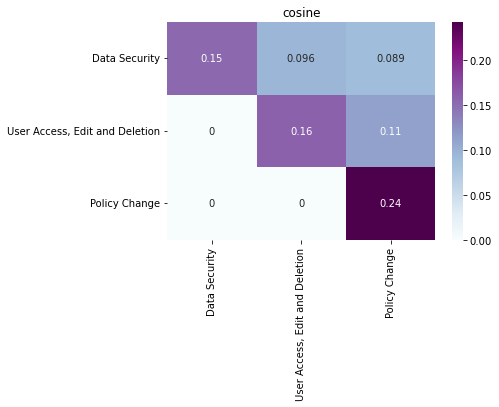

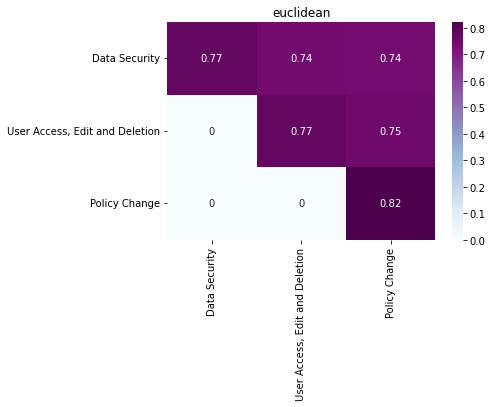

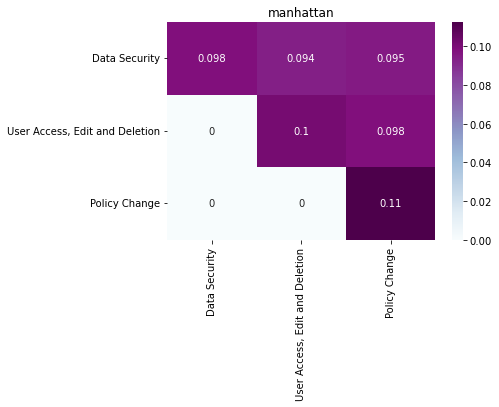

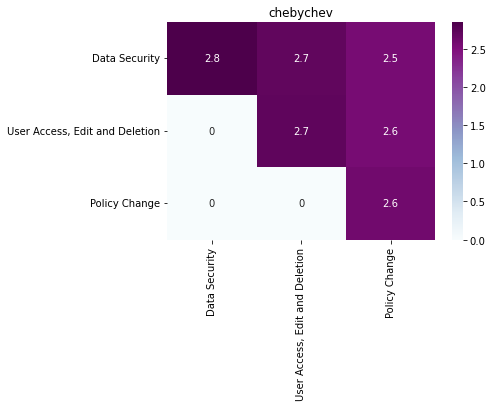

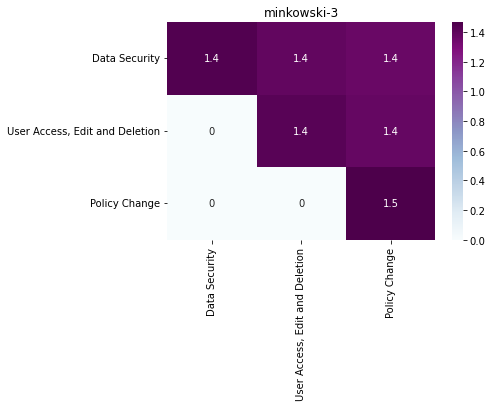

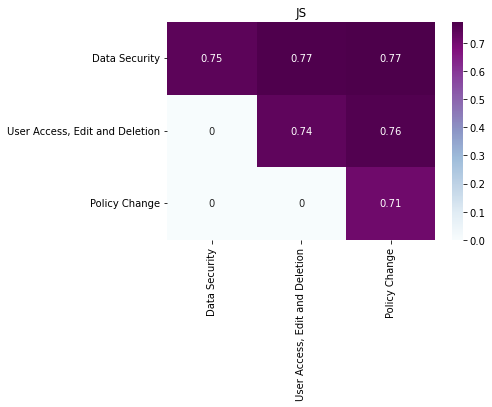

In [18]:
for sim_type, sim_df in similarities.items():
    
    plt.figure(figsize=(4,3))
    plt.title(sim_type)
    sns.heatmap(sim_df.fillna(0), annot=True,
            xticklabels=sim_df.columns,
            yticklabels=sim_df.columns, cmap="BuPu")